<a href="https://colab.research.google.com/github/KapilL2212/GRIP-Sparks-Foundation-Sep-2023/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTION USING DECISION TREE ALGORITHM

Author-Kapil Lohia
THE SPARKS FOUNDATION (GRIP): DATA SCIENCE AND BUSINESS ANALYTICS \


AIM- Create a Decision tree classifier and visualize it graphically.\
If we need a new data classifier will it be able to predict the right class accordingly?

Loading the Dataset.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Reading the dataset
path="/content/drive/MyDrive/Data set/Iris.csv"
ds=pd.read_csv(path)
ds.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
#dropping the id column as it is unnecessary
ds=ds.drop('Id',axis=1)

In [63]:
ds.info()# It verifies dataframe has no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [64]:
# Statistical data  analysis of dataframe.
ds.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
# Shape of dataset
ds.shape

(150, 5)

<ipython-input-66-0ffb37d40647>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=ds.corr()


<Axes: >

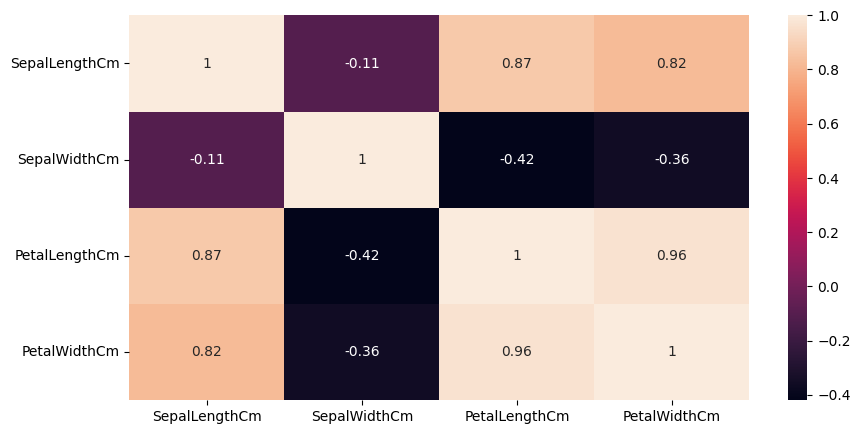

In [66]:
# Finding correlation between data And Plotting it into a heat map
correlation=ds.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(correlation,annot=True)

Petal length, petal width, sepal length, species is highly positively correlated whereas sepal width is negatively correlated to all.

In [67]:
# Converting categorical features into numeric.
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(ds['Species'])
ds['Species']=label.transform(ds['Species'])

In [68]:
#Check whether species column has been converted to numeric.
ds.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Splitting the model and training data.

In [69]:
X=ds.iloc[:,:-1]
Y=ds.iloc[:,-1]

In [70]:
#Splitting the data set to train and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Training the model

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Model trained successfully!')

Model trained successfully!


In [72]:
#Setting up prediction variable on test set
y_pred = dtree.predict(X_test)
y_pred


array([2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0,
       0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0,
       0])

# CONFUSION MATRIX

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 14]])

In [74]:

from sklearn import metrics
print(metrics.classification_report(y_test,y_pred,digits=3))


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        17
           1      1.000     0.929     0.963        14
           2      0.933     1.000     0.966        14

    accuracy                          0.978        45
   macro avg      0.978     0.976     0.976        45
weighted avg      0.979     0.978     0.978        45



The model has accuracy of 97.8% which means our model is effective with perfect precision as f1-score is about 0.96

# Visualization of Decision Tree

[Text(0.4, 0.9, 'petal width (cm) <= 0.7\ngini = 0.666\nsamples = 105\nvalue = [33, 36, 36]\nclass = versicolor'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 72\nvalue = [0, 36, 36]\nclass = versicolor'),
 Text(0.2, 0.5, 'petal width (cm) <= 1.65\ngini = 0.184\nsamples = 39\nvalue = [0, 35, 4]\nclass = versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.3, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass = virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5, 'petal length (cm) <= 5.05\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = virginica'),
 Text(0.7, 0.3, 'sepal length (cm) <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'

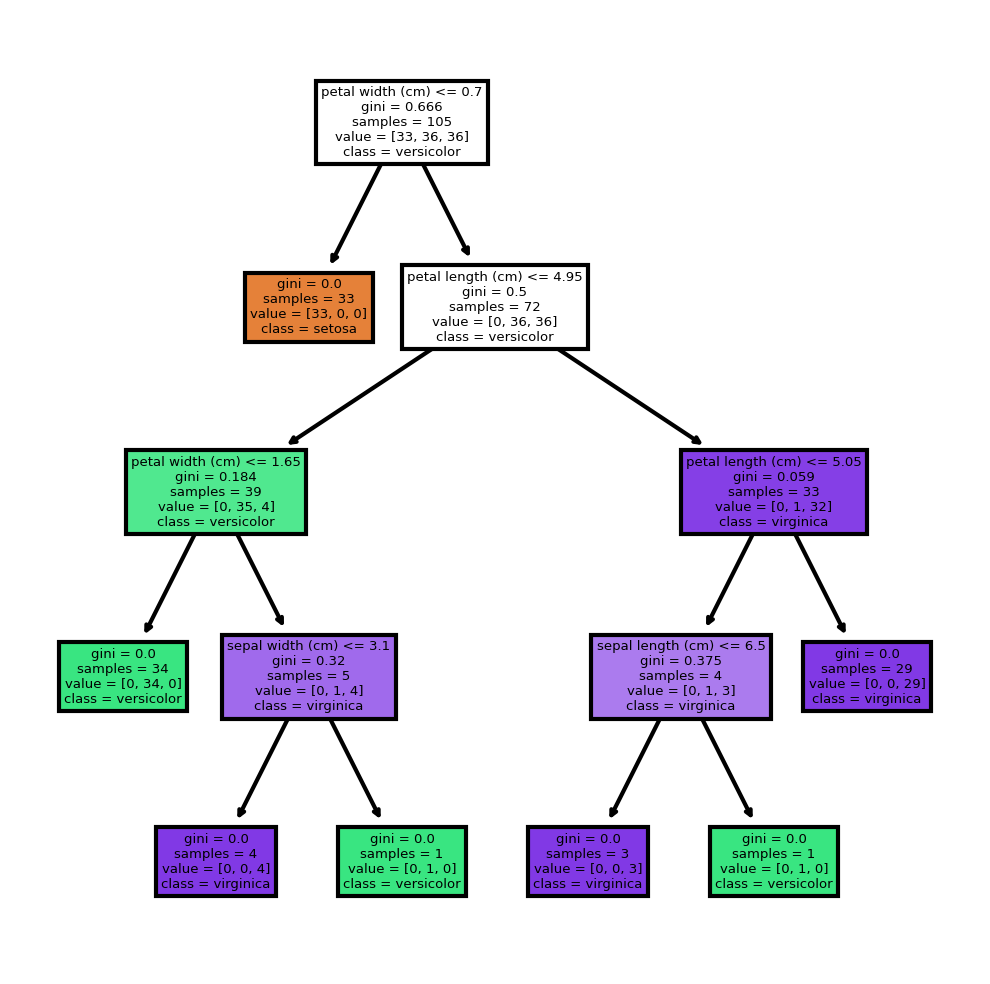

In [75]:
from sklearn import tree
import matplotlib.pyplot as plt

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtree, feature_names = fn, class_names = cn, filled = True)